## Αξιολόγηση Συσταδοποίησης

Θέλουμε να βρούμε έναν τρόπο να επιλέξουμε το βέλτιστο $k$ για το προηγούμενό μας πρόβλημα. Θέλουμε, δηλαδή, έναν τρόπο να αξιολογήσουμε την επίδοση του αλγορίθμου.

Όπως ξέρουμε δεν υπάρχουν ετικέτες σε ένα πρόβλημα μη-επιβλεπόμενης μάθησης. Οι μετρικές που είδαμε στην επιβλεπόμενη μάθηση για την αξιολόγηση ενός αλγορίθμου (accuracy, confusion matrix, f1-score) χρειάζονται τις ετικέτες για να υπολογιστούν. Πώς μπορούμε, λοιπόν, να αξιολογήσουμε την επίδοση ενός αλγορίθμου συσταδοποίησης;

Το πιο απλό μέτρο που μπορούμε να σκεφτούμε είναι να συγκρίνουμε για κάθε συστάδα τη διασπορά των παραδειγμάτων της συγκεκριμένης συστάδας.

Για τη συστάδα $C$ το παραπάνω μπορεί να υπολογιστεί ως εξής:

$$
I_C = \sum_{i \in C}{(x_i - \bar{x}_C)^2}
$$

όπου $x_i$ ένα παράδειγμα που ανήκει στη συστάδα $C$ με κέντρο $\bar{x}_C$.

Όσο πιο μικρό το μέτρο αυτό, τόσο μικρότερη διασπορά έχει η αντίστοιχη συστάδα, πράγμα επιθυμητό καθώς σημαίνει ότι είναι πιο "συμπαγής". Μετρικές σαν αυτή τις ονομάζουμε **inertia** (αδράνεια). Για να υπολογίσω τη συνολική αδράνεια, απλά προσθέτω τις διασπορές για όλα τα cluster.

$$
Ι = \sum_{C = 1}^k{I_C}
$$

Πολλές φορές το σταθμίζουμε και με τη συνολική διασπορά στο σύνολο δεδομένων. Ας δούμε ένα αντίστοιχο παράδειγμα με το προηγούμενο, χρησιμοποιώντας την υλοποίηση του [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) από το scikit-klearn...

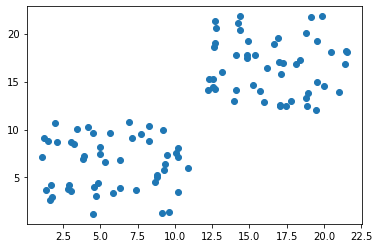

In [ ]:
#                                                  ΚΩΔΙΚΑΣ:
#                              --------------------------------------------
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(55) # για να αναπαράγονται τα αποτελέσματα...

p1 = np.random.rand(50,2) * 10 + 1 # 100 τυχαίοι αριθμοί από ομοιόμορφη κατανομή στο διάστημα [1,11), αποθηκευμένοι σε πίνακα διαστάσεων 50x2.
p2 = np.random.rand(50,2) * 10 + 12 # 100 τυχαίοι αριθμοί από ομοιόμορφη κατανομή στο διάστημα [12,22), αποθηκευμένοι σε πίνακα διαστάσεων 50x2.

points = np.concatenate([p1, p2]) # ενώνουμε τους αριθμούς σε έναν ενιαίο πίνακα διαστάσεων 100x2
                                  # η πρώτη στήλη του πίνακα αντιστοιχεί στη συντεταγμένη x ενώ η δεύτερη στην y
                                  # δηλαδή η 30η γραμμή του πίνακα αντιπροσωπεύει τις 2 συντεταγμένες του 30ου παραδείγματος 

#                                                ΣΧΕΔΙΑΣΗ:
#                              --------------------------------------------

plt.scatter(points[:,0], points[:,1]) # για να σχεδιάσουμε τη γραφική παράσταση διακριτών σημείων χρησιμοποιούμε την scatter
                                      # τα 2 της ορίσματα είναι οι συντεταγμένες x και y όλων των σημείων

769.242668057399


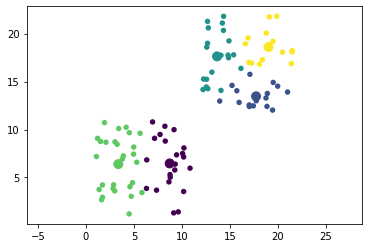

In [ ]:
#                                                  ΚΩΔΙΚΑΣ:
#                              --------------------------------------------

from sklearn.cluster import KMeans

k = 5
km = KMeans(k, random_state=99)
km.fit(points)

print(km.inertia_)

#                                                ΣΧΕΔΙΑΣΗ:
#                              --------------------------------------------

plt.scatter(points[:,0], points[:,1], c=km.predict(points), lw=0, s=30)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c=range(km.n_clusters), s=80)
axes_scaling = plt.axis('equal')

Όσο μικρότερη η αδράνεια, τόσο καλύτερο clustering έχει γίνει. Προφανώς θέλουμε να **ελαχιστοποιήσουμε** το κριτήριο αυτό. Ας τρέξουμε λοιπόν τον $k$-means για $k$ από 1 μέχρι 100 να δούμε σε ποια τιμή ελαχιστοποιείται ο δείκτης αυτός.

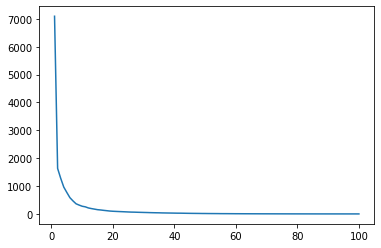

In [ ]:
#                                                  ΚΩΔΙΚΑΣ:
#                              --------------------------------------------

cluster_scores = []
for k in range(1, 101):
    km = KMeans(k, random_state=77)
    km.fit(points)
    cluster_scores.append(km.inertia_)

#                                                ΣΧΕΔΙΑΣΗ:
#                              --------------------------------------------

plt.plot(range(1, 101), cluster_scores)

Παρατηρούμε ότι η αδράνεια μικραίνει όσο μεγαλώνει το $k$, και φτάνει στο 0 όταν $k=N$, όπου $N$ το πλήθος των παραδειγμάτων μας. Το να ορίσουμε μια συστάδα για κάθε δείγμα είναι τετριμμένη λύση, γιατί δεν μας βοηθάει να εξηγήσουμε τα δεδομένα και να εξάγουμε γνώση από αυτά, που είναι ο στόχος στην μη-επιβλεπόμενη μάθηση.

Άρα δεν μπορεί να μας βοηθήσει το κριτήριο αυτό για τον υπολογισμό του βέλτιστου $k$.

Ένα **εμπειρικό** κριτήριο που μπορεί να βοηθήσει είναι αυτό που αποκαλούμε [μέθοδο του "αγκώνα"](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) (elbow). Κοιτάμε δηλαδή στη γραφική παράσταση της αδράνειας ή της διασποράς ως προς το $k$, σε ποιο σημείο σχηματίζει έναν "αγκώνα" η γραφική. Αυτό υπολογίζεται κοιτάζοντας και τη δεύτερη παράγωγο της αντίστοιχης γραφικής.



Text(5, 4500, 'elbow')

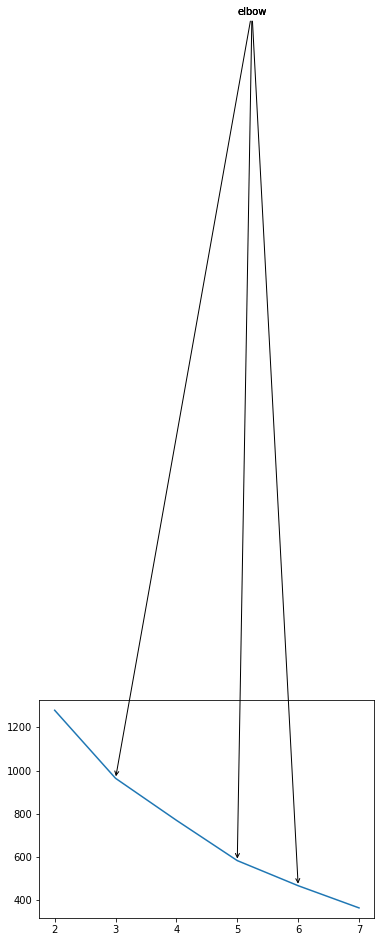

In [ ]:
#                                                ΣΧΕΔΙΑΣΗ:
#                              --------------------------------------------

plt.plot(range(2,8), cluster_scores[2:8])
plt.annotate("elbow", xy=(3, cluster_scores[3]), xytext=(5, 4500),arrowprops=dict(arrowstyle="->"))
plt.annotate("elbow", xy=(5, cluster_scores[5]), xytext=(5, 4500),arrowprops=dict(arrowstyle="->"))
plt.annotate("elbow", xy=(6, cluster_scores[6]), xytext=(5, 4500),arrowprops=dict(arrowstyle="->"))

Δηλαδή στη συγκεκριμένη περίπτωση θα ήταν $k=3$, $k=5$ ή $k=6$.

Για να αποκτήσουμε μια πιο "αντικειμενική" εικόνα υπάρχουν 2 βασικοί τρόποι [αξιολόγησης αλγορίθμων συσταδοποίησης](https://en.wikipedia.org/wiki/Cluster_analysis#Evaluation_and_assessment): η *εξωτερική* (external) και η *εσωτερική* (internal).


### Εξωτερική Αξιολόγηση

Η εξωτερική αξιολόγηση (Extrinsic evaluation) απαιτεί την εκτέλεση του αλγορίθμου σε ένα πρόβλημα επιβλεπόμενης μάθησης (που έχουμε τις ετικέτες δλδ ποιο δείγμα ανήκει σε ποια ομάδα) και την "εξωτερική" του αξιολόγηση με βάση αυτές. Δεν αποτελεί τυπική περίπτωση συσταδοποίησης και δεν θα την εξετάσουμε περισσότερο.



### Εσωτερική Αξιολόγηση
Η Εσωτερική αξιολόγηση (Intrinsic Evaluation) απαιτεί την ανάλυση της δομής ή της ευστάθειας των παραγόμενων από τον αλγόριθμο συστάδων. Για να το πετύχουμε αυτό, χρησιμοποιούμε διάφορους δείκτες ή συντελεστές.


- [Dunn index](https://en.wikipedia.org/wiki/Dunn_index):
Ο αριθμητής του dunn index είναι ένα μέτρο της **μικρότερης απόστασης μεταξύ δυο συστάδων** (π.χ. απόσταση μεταξύ των κέντρων τους).  
Στον παρονομαστή μπαίνει ένα μέτρο του **μεγέθους της μεγαλύτερης συστάδας** (π.χ. η απόσταση μεταξύ των 2 πιο απομακρυσμένων παραδειγμάτων που ανήκουν στη συστάδα αυτή).

$$
DI= \frac{ min \left( δ \left( C_i, C_j \right) \right)}{ max \, Δ_p }
$$

όπου $C_i, C_j$ είναι δυο τυχαία κέντρα συστάδων, $δ \left( C_i, C_j \right)$ είναι ένα μέτρο της απόστασής τους και $Δ_p$ είναι ένα μέτρο της "διαμέτρου" της συστάδας $p$, όπου $p \in [0,k]$.

- [Silhouette coefficient](https://en.wikipedia.org/wiki/Silhouette_(clustering)):
$$
s \left( i \right) = \frac{b \left( i \right) -a \left( i \right) }{max \left( a \left( i \right) , b \left( i \right) \right)}
$$

Έστω $i$ ένα σημείο (point) οποιασδήποτε συστάδας. 

Το $a(i)$ είναι η μέση απόσταση του $i$ από όλα τα υπόλοιπα σημεία της συστάδας στην οποία ανήκει. Όσο μικρότερο είναι το $a(i)$, τόσο περισσότερο ομοιάζει το $i$ στα υπόλοιπα δείγματα της συστάδας.

To $b(i)$ είναι η μικρότερη μέση απόσταση του $i$ από όλα τα σημεία σε οποιαδήποτε άλλη συστάδα, στην οποία το $i$ δεν ανήκει. Η συστάδα με την μικρότερη μέση απόσταση από το $i$ θεωρείται "γειτονική" (η δεύτερη καλύτερη επιλογή ομαδοποίησης).

Μικρό $a(i)$ σημαίνει ότι η συστάδα του $i$ είναι συμπαγής ενώ μεγάλο $b(i)$ σημαίνει ότι το $i$ έχει μεγάλη απόσταση από την κοντινότερη συστάδα.

Το εύρος τιμών που μπορεί να πάρει το $s(i)$ είναι στο $[-1, 1]$. Όσο πιο μεγάλο, τόσο πιο ξεκάθαρες οι συστάδες μεταξύ τους. Για να είναι το $s(i) \approx 1$, πρέπει το $b(i) >> a(i)$.

Για να αξιολογήσουμε τον αλγόριθμό μας συνήθως παίρνουμε το μέσο όρο των $s(i)$ για όλα τα $i$.

